In [1]:
#Library imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
plt.style.use('ggplot')

In [2]:
# Read dataset (CSV file saved in local)

df = pd.read_csv("movies.csv")

In [3]:
# View the data at glance

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
# Check the columns for missing values

df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
#Check the datatype of the variables

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

### Typecasting "gross", "budget" and "votes" column to int

In [6]:
#Helper function to cast int to selected columns

def int_conv(x, dt):
    try:
        return dt(x)
    except:
        return -1 # -1 is replaced for NaN values

In [7]:
# Applying function to the variable

df["gross"] = df["gross"].apply(int_conv, dt = int)
df["budget"] = df["budget"].apply(int_conv, dt = int)
df["votes"] = df["votes"].apply(int_conv, dt = int)

In [8]:
df[["budget", "gross", "votes"]].dtypes

budget    int64
gross     int64
votes     int64
dtype: object

In [9]:
df["released"]

0          June 13, 1980 (United States)
1           July 2, 1980 (United States)
2          June 20, 1980 (United States)
3           July 2, 1980 (United States)
4          July 25, 1980 (United States)
                      ...               
7663    October 23, 2020 (United States)
7664    February 7, 2020 (United States)
7665           April 27, 2020 (Cameroon)
7666     October 1, 2020 (United States)
7667     August 19, 2020 (United States)
Name: released, Length: 7668, dtype: object

### Separating date from the column "released" and converting the resultant string to date format

In [10]:
df["released_date"] = pd.to_datetime(df["released"].str.split(pat = "(", expand = True)[0])

In [11]:
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02


In [12]:
## Data inconsistency: "year" column is not matching with the year of released date

df[df["released_date"].dt.year != df["year"]][:10]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981-06-19
11,The Gods Must Be Crazy,PG,Adventure,1980,"October 26, 1984 (United States)",7.3,54000,Jamie Uys,Jamie Uys,N!xau,South Africa,5000000,30031783,C.A.T. Films,109.0,1984-10-26
21,Heaven's Gate,R,Adventure,1980,"April 24, 1981 (United States)",6.8,14000,Michael Cimino,Michael Cimino,Kris Kristofferson,United States,44000000,3484523,Partisan Productions,219.0,1981-04-24
33,Cattle Annie and Little Britches,PG,Drama,1980,"April 24, 1981 (United States)",6.1,604,Lamont Johnson,David Eyre,Scott Glenn,United States,5100000,534816,Cattle Annie Productions,97.0,1981-04-24
40,The Watcher in the Woods,PG,Family,1980,"October 9, 1981 (United States)",6.3,5700,John Hough,Brian Clemens,Bette Davis,United States,-1,5000000,Walt Disney Productions,84.0,1981-10-09
49,Lion of the Desert,PG,Biography,1980,"May 16, 1981 (Japan)",8.3,15000,Moustapha Akkad,David Butler,Anthony Quinn,Libya,35000000,-1,Falcon International Productions,173.0,1981-05-16
54,City of Women,R,Comedy,1980,"April 8, 1981 (United States)",7.0,6700,Federico Fellini,Federico Fellini,Marcello Mastroianni,Italy,-1,12516,Opera Film Produzione,139.0,1981-04-08
59,Hangar 18,PG,Sci-Fi,1980,"March 13, 1981 (Ireland)",5.3,2400,James L. Conway,Ken Pettus,Darren McGavin,United States,11000000,-1,Sunn Classic Pictures,97.0,1981-03-13
62,It's My Turn,R,Comedy,1980,"February 5, 1981 (Argentina)",5.5,875,Claudia Weill,Eleanor Bergstein,Jill Clayburgh,United States,-1,-1,Rastar Films,91.0,1981-02-05
79,Windwalker,PG,Adventure,1980,"November 18, 1983 (Sweden)",6.9,1000,Kieth Merrill,Ray Goldrup,Trevor Howard,United States,3000000,-1,Santa Fe International,108.0,1983-11-18


In [13]:
# sort movies by highest revenues first
df.sort_values(by = ["gross"], ascending = False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,-1,-1,Gibraltar Entertainment,92.0,1990-01-26
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,-1,-1,Allied Vision,85.0,1989-04-14
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,-1,-1,Trans World Entertainment (TWE),89.0,1989-04-07
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,-1,-1,Budapest Stúdió Vállalat,104.0,1990-01-13


In [14]:
#drop duplicates

df["name"].drop_duplicates()

0                                          The Shining
1                                      The Blue Lagoon
2       Star Wars: Episode V - The Empire Strikes Back
3                                            Airplane!
4                                           Caddyshack
                             ...                      
7663                                      More to Life
7664                                       Dream Round
7665                                     Saving Mbango
7666                                      It's Just Us
7667                                         Tee em el
Name: name, Length: 7512, dtype: object

<AxesSubplot: xlabel='gross', ylabel='budget'>

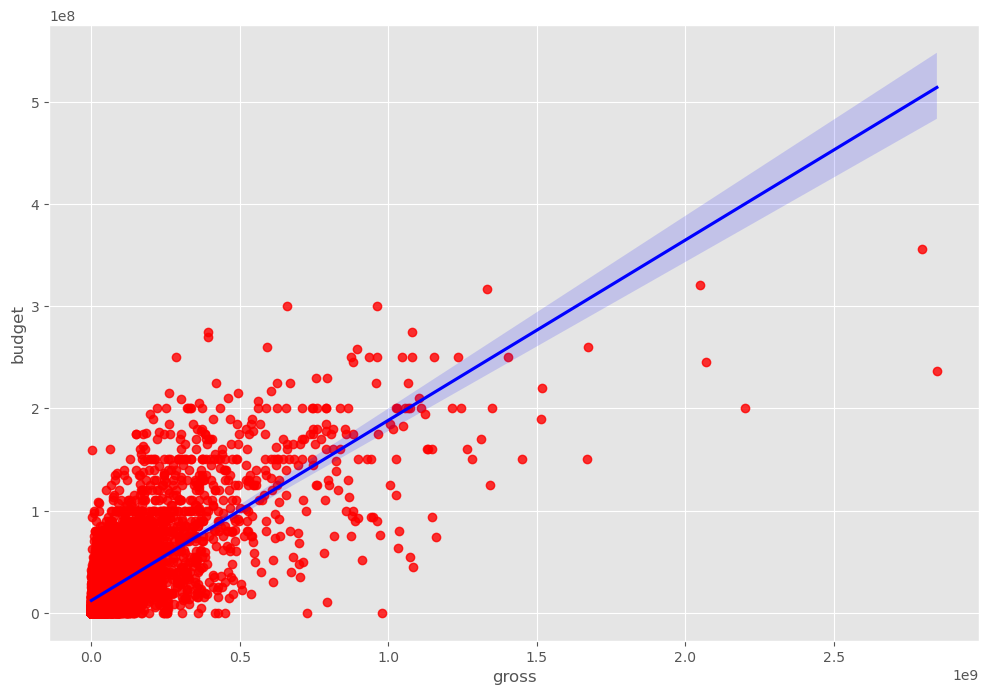

In [15]:
# Draw scatter plot for relationships
# Budget vs Gross

sns.regplot(y="budget", x="gross", data = df, scatter_kws = {"color" : "red"}, line_kws = {"color" : "blue"})

In [16]:
df.corr(method = "pearson")  #other methods = Kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222427,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222427,0.409182,1.000000,0.486931,0.632870,0.309122
budget,0.309212,0.055665,0.486931,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632870,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309122,0.269510,0.245235,1.000000


In [17]:
#There is high positive relationship between budget and gross

Text(0.5, 1.0, 'Correlation matrix for Numeric Features')

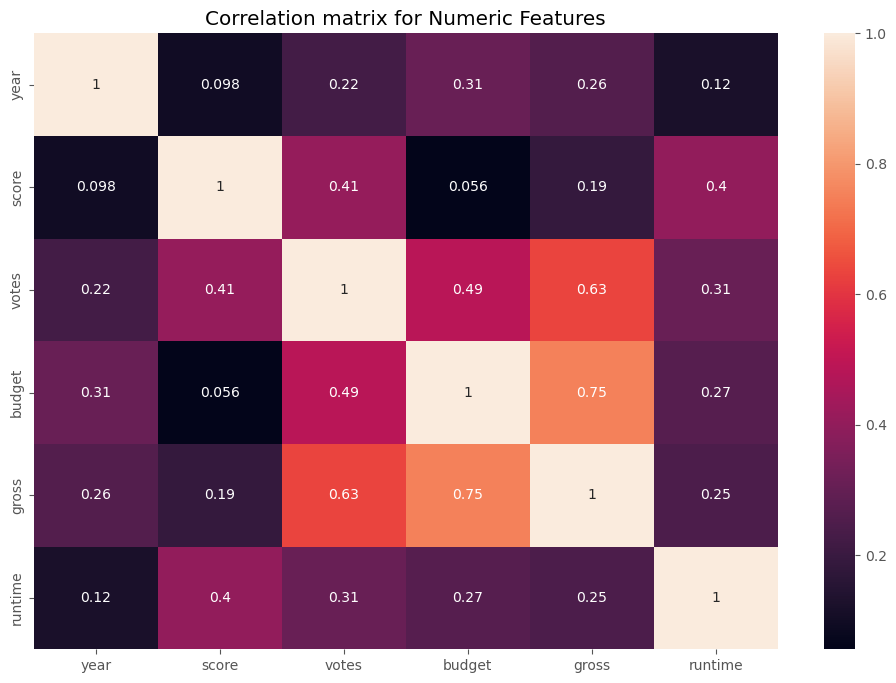

In [18]:
correlation_matrix = df.corr(method = "pearson")
sns.heatmap(correlation_matrix, annot=True)
plt.title("Correlation matrix for Numeric Features")

In [19]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,released_date
name,1.000000,0.143938,0.036367,0.965761,0.959015,-0.046733,0.290143,0.745905,0.805211,0.731565,0.142828,0.275691,0.947540,0.591667,0.048955,0.960030
rating,0.143938,1.000000,-0.086723,0.156713,0.146606,0.012595,0.098171,0.085520,0.103623,0.093116,0.000494,0.193229,0.158575,-0.028035,0.032741,0.149648
genre,0.036367,-0.086723,1.000000,0.037184,0.035940,-0.002437,0.021797,0.047288,0.033688,0.038649,-0.015795,0.069445,0.038635,0.009566,0.001462,0.037071
year,0.965761,0.156713,0.037184,1.000000,0.993190,-0.044981,0.314745,0.770497,0.824770,0.756400,0.140216,0.298022,0.981090,0.601571,0.050647,0.993841
released,0.959015,0.146606,0.035940,0.993190,1.000000,-0.045761,0.302365,0.770876,0.819617,0.754468,0.148468,0.284017,0.976647,0.607954,0.048235,0.998748
score,-0.046733,0.012595,-0.002437,-0.044981,-0.045761,1.000000,-0.012384,-0.022687,-0.034685,-0.009896,0.023097,-0.011749,-0.047004,-0.028432,0.026436,-0.045180
votes,0.290143,0.098171,0.021797,0.314745,0.302365,-0.012384,1.000000,0.193607,0.226902,0.182881,-0.046388,0.395999,0.283068,0.009028,0.107154,0.304842
director,0.745905,0.085520,0.047288,0.770497,0.770876,-0.022687,0.193607,1.000000,0.748340,0.682385,0.155471,0.108033,0.751149,0.552258,-0.011070,0.769182
writer,0.805211,0.103623,0.033688,0.824770,0.819617,-0.034685,0.226902,0.748340,1.000000,0.675685,0.157202,0.186680,0.805784,0.546151,0.032264,0.820902
star,0.731565,0.093116,0.038649,0.756400,0.754468,-0.009896,0.182881,0.682385,0.675685,1.000000,0.182045,0.110870,0.735911,0.527116,0.035392,0.753731


Text(0.5, 1.0, 'Correlation matrix for Movies')

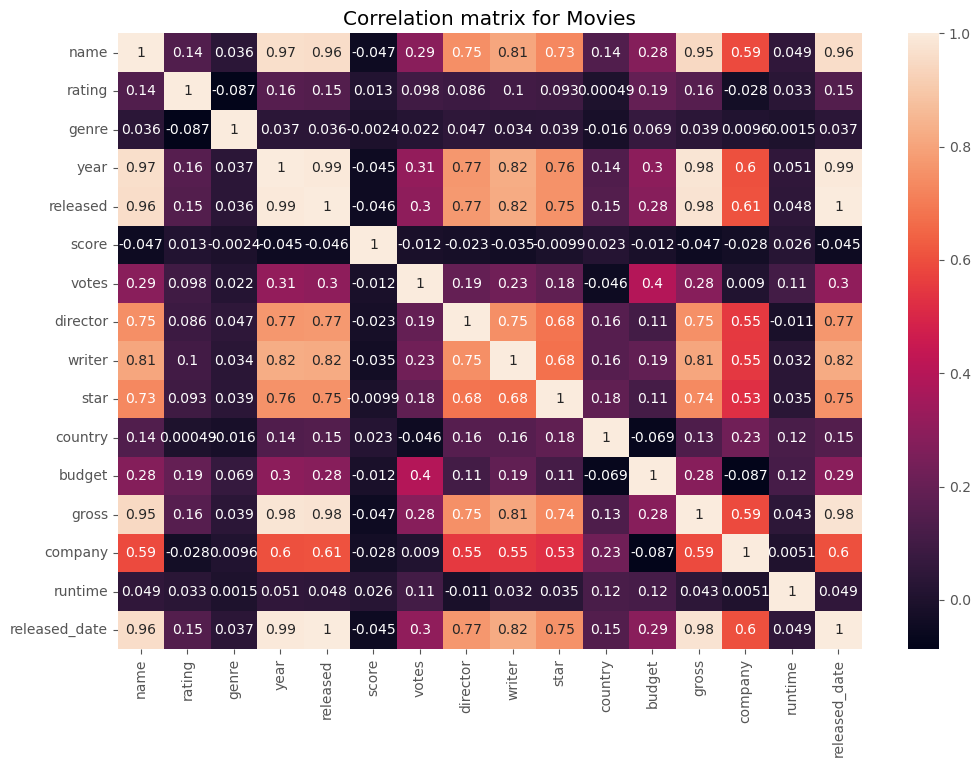

In [20]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation matrix for Movies")

In [21]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 
CompanyGrossSumSorted

company
Warner Bros.                 56491421805
Universal Pictures           52514188889
Columbia Pictures            43008941346
Paramount Pictures           40493607414
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230103
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [22]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()
CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 
CompanyGrossSumSorted

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64